Importación del dataset de entrenamiento y dataset de pruebas por separado

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_ds = pd.read_csv('data/mitbih_train.csv')
traindf = pd.DataFrame(train_ds)
test_ds = pd.read_csv('data/mitbih_test.csv')
testdf = pd.DataFrame(test_ds)

traindf.columns = range(traindf.shape[1])
testdf.columns = range(testdf.shape[1])
print(traindf)

            0         1         2         3         4         5         6    \
0      0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
1      1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
2      0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
3      0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
4      0.927461  1.000000  0.626943  0.193437  0.094991  0.072539  0.043178   
...         ...       ...       ...       ...       ...       ...       ...   
87548  0.807018  0.494737  0.536842  0.529825  0.491228  0.484211  0.456140   
87549  0.718333  0.605000  0.486667  0.361667  0.231667  0.120000  0.051667   
87550  0.906122  0.624490  0.595918  0.575510  0.530612  0.481633  0.444898   
87551  0.858228  0.645570  0.845570  0.248101  0.167089  0.131646  0.121519   
87552  0.901506  0.845886  0.800695  0.748552  0.687138  0.599073  0.512167   

            7         8         9    ...  178  179 

Prueba de varios modelos con balanceo(Submuestreo de 20000 en la clase mayoritaria y sobremuestreo con SMOTE en las clases 1, 2 y 3)

Se realizó con validación cruzada y con los datos de entrenamiento.

----- Random Forest -----
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     72470
         1.0       0.85      0.77      0.81      2223
         2.0       0.95      0.92      0.93      5788
         3.0       0.76      0.76      0.76       641
         4.0       0.99      0.96      0.98      6431

    accuracy                           0.98     87553
   macro avg       0.91      0.88      0.89     87553
weighted avg       0.98      0.98      0.98     87553



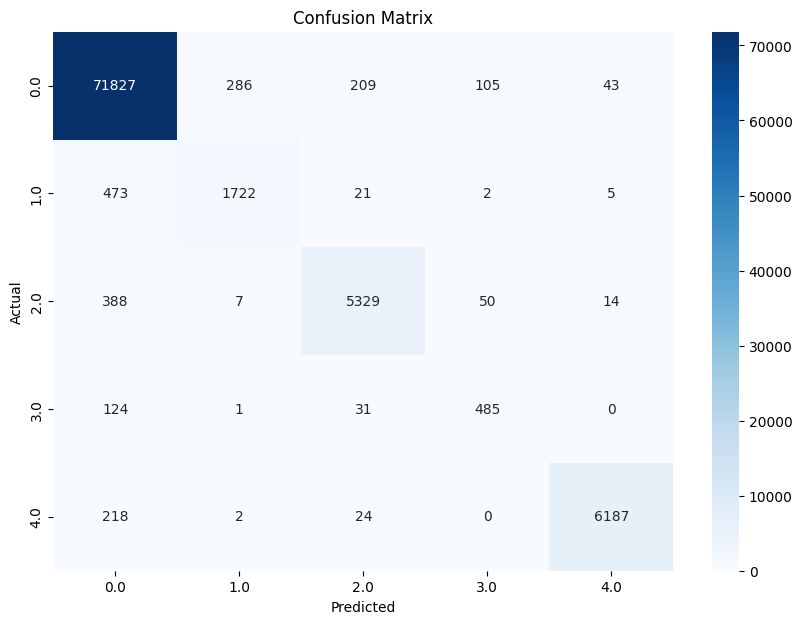

----- RandomForest Weight Balance -----
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     72470
         1.0       0.87      0.77      0.81      2223
         2.0       0.96      0.92      0.94      5788
         3.0       0.75      0.75      0.75       641
         4.0       0.99      0.96      0.98      6431

    accuracy                           0.98     87553
   macro avg       0.91      0.88      0.89     87553
weighted avg       0.98      0.98      0.98     87553



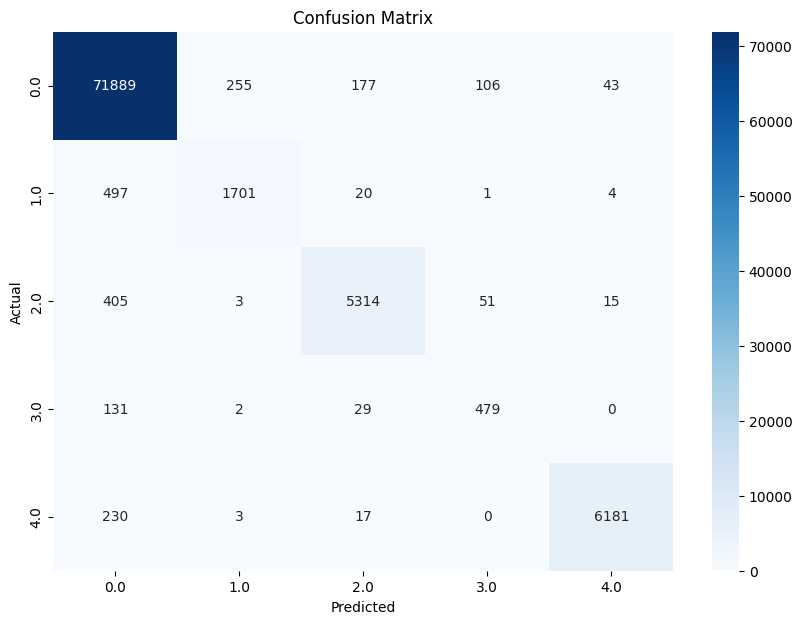

----- Balanced RandomForest -----


c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     72470
         1.0       0.59      0.85      0.69      2223
         2.0       0.86      0.95      0.90      5788
         3.0       0.46      0.81      0.59       641
         4.0       0.95      0.98      0.96      6431

    accuracy                           0.96     87553
   macro avg       0.77      0.91      0.82     87553
weighted avg       0.96      0.96      0.96     87553



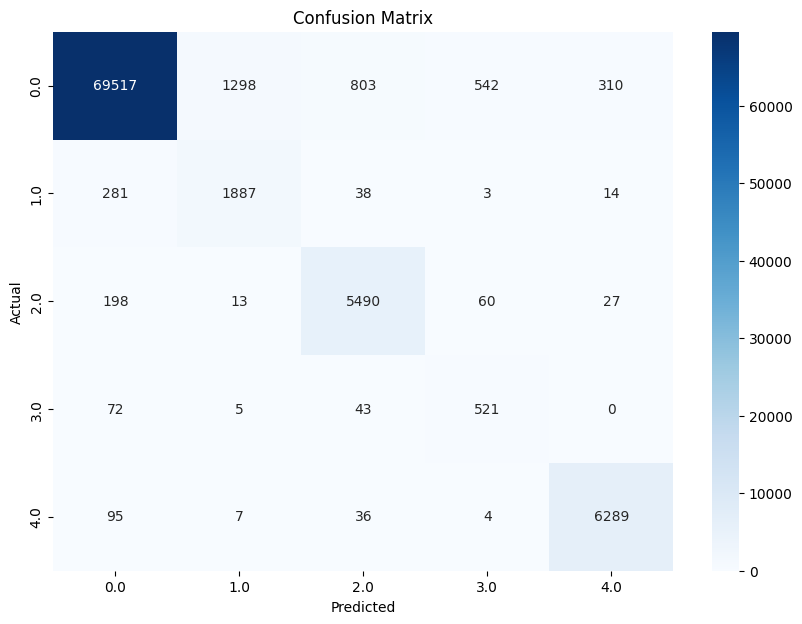

In [3]:
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar los datos de entrenamiento y prueba
X = traindf.iloc[:, :-1]  # Todas las columnas excepto la última (características)
y = traindf.iloc[:, -1]   # La última columna (clase)

X_t = testdf.iloc[:, :-1]  # Conjunto de características de prueba
y_t = testdf.iloc[:, -1]   # Conjunto de etiquetas de prueba

# Definir los modelos
models2 = {
    'Random Forest': RandomForestClassifier(),
    'RandomForest Weight Balance': RandomForestClassifier(class_weight='balanced'),
    'Balanced RandomForest' : BalancedRandomForestClassifier()
}

# Evaluar los modelos
kf = StratifiedKFold(n_splits=5, shuffle=True)

for model_name, model in models2.items():
    print(f'----- {model_name} -----')

    cv_y_test = []
    cv_y_pred = []

    # Validación cruzada en el conjunto de entrenamiento
    for train_index, test_index in kf.split(X, y):
        # Separar datos de entrenamiento y prueba
        x_train = X.iloc[train_index, :]
        y_train = y.iloc[train_index]
        x_test = X.iloc[test_index, :]
        y_test = y.iloc[test_index]

        # Aplicar submuestreo para reducir la clase mayoritaria en el conjunto de entrenamiento
        under_sampler = RandomUnderSampler(sampling_strategy={0.0: 20000}, random_state=42)
        X_train_under, y_train_under = under_sampler.fit_resample(x_train, y_train)

        # Aplicar sobremuestreo con SMOTE para las clases con menos de 6000 ejemplos en el conjunto de entrenamiento
        smote = SMOTE(sampling_strategy={1.0: 6000, 2.0: 6000, 3.0: 6000}, random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_under, y_train_under)

        # Entrenar el modelo
        model.fit(X_train_resampled, y_train_resampled)
        
        # Predecir sobre el conjunto de prueba
        y_pred = model.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    # Imprimir informe de clasificación
    print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

    cm = confusion_matrix(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

    # Visualizar la matriz de confusión
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(np.concatenate(cv_y_test)), yticklabels=np.unique(np.concatenate(cv_y_test)))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Podemos observar que RandomForest y Weight Balanced RandomForest mantienen números de precisión bastante buenos y recalls decentes, estos 2 modelos parecen estar bastante equilibrados y parecen ajustarse bien a los datos con este balanceo.

En cuanto a BalancedRandomForest este modelo parace conportarse bastante parecido a como lo hacía sin balanceo, precisiones muy bajas en las clases 1 y 3, pero recalls muy buenos en estas clases.

-
-
-
-
-

#Prueba de varios modelos con balanceo (Submuestreo de 20000 para la clase mayoritaría y sobremuestreo SMOTE para la clase 1, 2 y 3) muestras en cada clase

Se realizó con validación cruzada y al final se probó con el dataset de prueba.

----- Random Forest -----
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18117
         1.0       0.82      0.75      0.78       556
         2.0       0.96      0.91      0.94      1448
         3.0       0.71      0.77      0.74       162
         4.0       0.99      0.95      0.97      1608

    accuracy                           0.98     21891
   macro avg       0.89      0.87      0.88     21891
weighted avg       0.98      0.98      0.98     21891



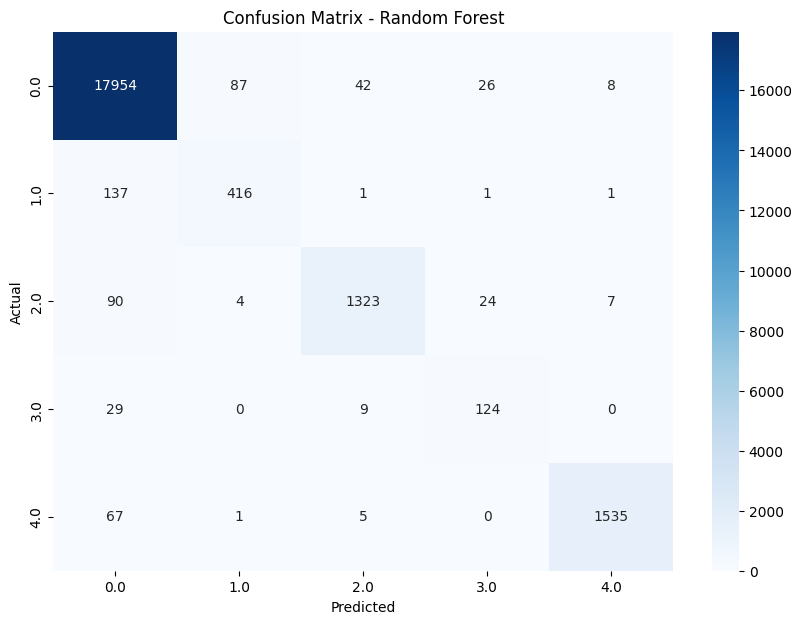

----- Balanced Random Forest -----


c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     18117
         1.0       0.55      0.82      0.66       556
         2.0       0.86      0.95      0.90      1448
         3.0       0.43      0.81      0.57       162
         4.0       0.95      0.97      0.96      1608

    accuracy                           0.95     21891
   macro avg       0.76      0.90      0.81     21891
weighted avg       0.96      0.95      0.96     21891



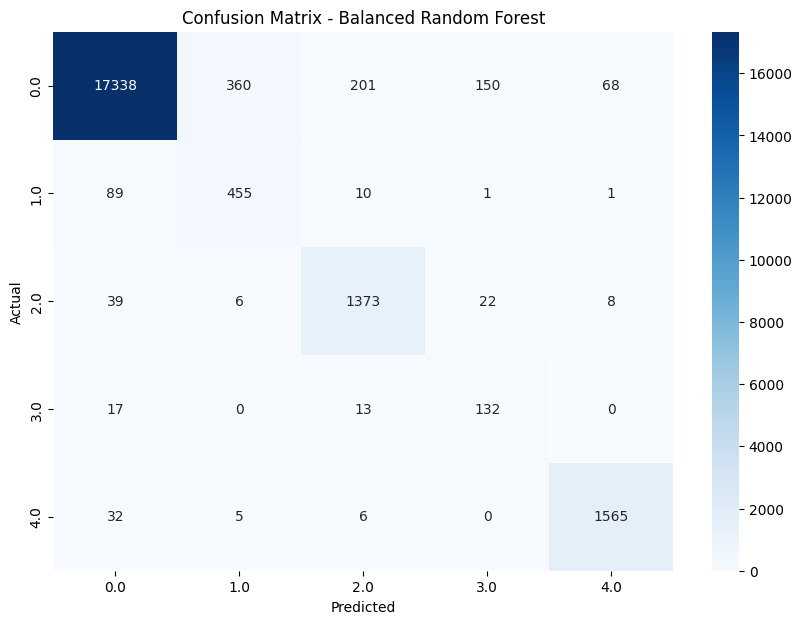

----- RandomForest Weight Balance -----
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18117
         1.0       0.84      0.74      0.79       556
         2.0       0.96      0.91      0.94      1448
         3.0       0.74      0.77      0.75       162
         4.0       0.99      0.95      0.97      1608

    accuracy                           0.98     21891
   macro avg       0.90      0.87      0.89     21891
weighted avg       0.98      0.98      0.98     21891



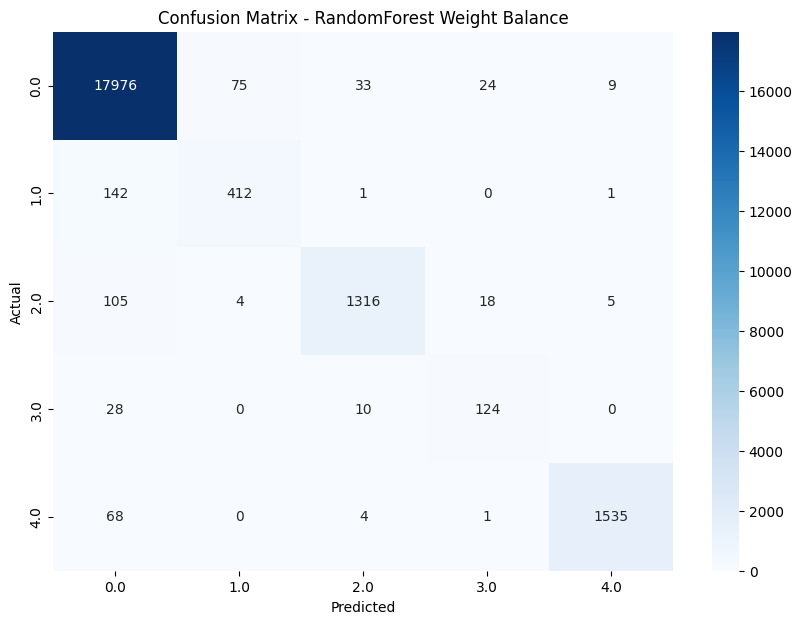

In [4]:
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar los datos de entrenamiento y prueba
X = traindf.iloc[:, :-1]  # Todas las columnas excepto la última (características)
y = traindf.iloc[:, -1]   # La última columna (clase)

X_t = testdf.iloc[:, :-1]  # Conjunto de características de prueba
y_t = testdf.iloc[:, -1]   # Conjunto de etiquetas de prueba

# Definir los modelos
models3 = {
    'Random Forest': RandomForestClassifier(),
    'Balanced Random Forest': BalancedRandomForestClassifier(),
    'RandomForest Weight Balance': RandomForestClassifier(class_weight='balanced')
}

# Evaluar los modelos
kf = StratifiedKFold(n_splits=5, shuffle=True)

for model_name, model in models3.items():
    print(f'----- {model_name} -----')

    cv_y_test = []
    cv_y_pred = []

    # Validación cruzada en el conjunto de entrenamiento
    for train_index, test_index in kf.split(X, y):
        # Separar datos de entrenamiento y prueba
        x_train = X.iloc[train_index, :]
        y_train = y.iloc[train_index]
        x_test = X.iloc[test_index, :]
        y_test = y.iloc[test_index]

        # Aplicar submuestreo para reducir la clase mayoritaria en el conjunto de entrenamiento
        under_sampler = RandomUnderSampler(sampling_strategy={0.0: 20000}, random_state=42)
        X_train_under, y_train_under = under_sampler.fit_resample(x_train, y_train)

        # Aplicar sobremuestreo con SMOTE para las clases con menos de 6000 ejemplos en el conjunto de entrenamiento
        smote = SMOTE(sampling_strategy={1.0: 6000, 2.0: 6000, 3.0: 6000}, random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_under, y_train_under)

        # Entrenar el modelo
        model.fit(X_train_resampled, y_train_resampled)

    # Una vez entrenado el modelo, predecir en el conjunto de prueba
    y_pred_test = model.predict(X_t)

    # Imprimir el informe de clasificación con los datos de prueba
    print(classification_report(y_t, y_pred_test))

    # Generar y visualizar la matriz de confusión con los datos de prueba
    cm = confusion_matrix(y_t, y_pred_test)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_t), yticklabels=np.unique(y_t))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


-
-
-
-
-

#Prueba de hiperparámetros con GridSearch para RandomForest y BalancedRandomForest con el balanceo (Submuestreo de 20000 para la clase mayoritaría y sobremuestreo SMOTE para la clase 1, 2 y 3).

Random Forest Grid Search
Mejores parámetros RF: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Balanced Random Forest Grid Search


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `Fals

Mejores parámetros BRF: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Resultados Random Forest:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18117
         1.0       0.83      0.76      0.79       556
         2.0       0.96      0.92      0.94      1448
         3.0       0.72      0.79      0.75       162
         4.0       0.99      0.96      0.97      1608

    accuracy                           0.98     21891
   macro avg       0.90      0.88      0.89     21891
weighted avg       0.98      0.98      0.98     21891

Resultados Balanced Random Forest:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98     18117
         1.0       0.58      0.82      0.68       556
         2.0       0.87      0.95      0.91      1448
         3.0       0.48      0.83      0.61       162
         4.0       0.96      0.97      0.96      1608

    accuracy  

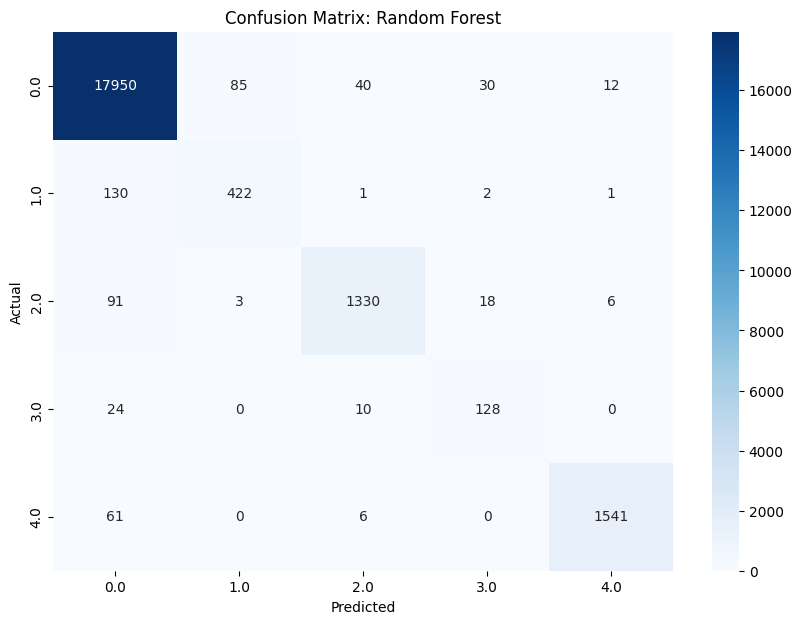

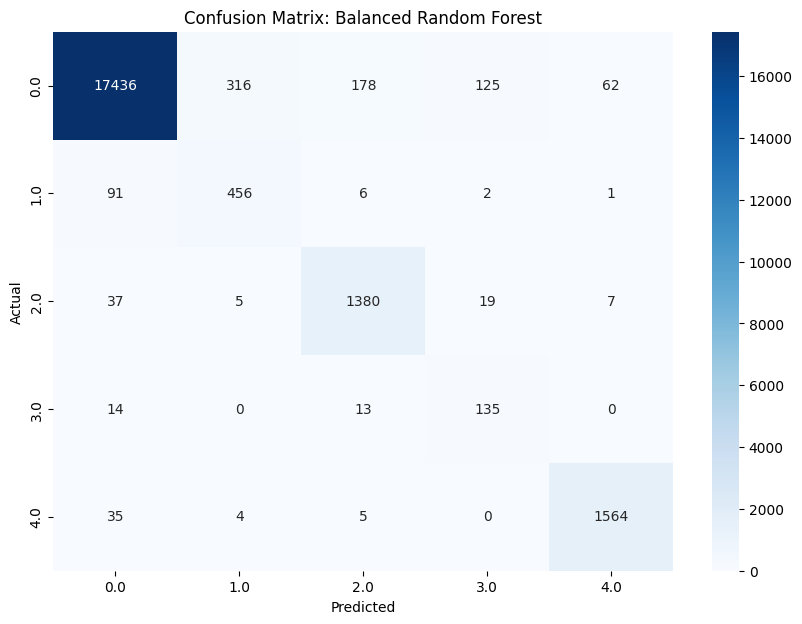

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los parámetros a probar en RandomForest
param_grid_rf = {
    'model__n_estimators': [100, 200,500],  # Número de árboles
    'model__max_depth': [10, 20, 30, None],      # Profundidad máxima de los árboles
    'model__min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
}

# Definir los parámetros a probar en BalancedRandomForest
param_grid_brf = {
    'model__n_estimators': [100, 200, 500],  # Número de árboles
    'model__max_depth': [10, 20, 30, None],      # Profundidad máxima de los árboles
    'model__min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
}

# Cargar los datos
X = traindf.iloc[:, :-1]  # Todas las columnas excepto la última (características)
y = traindf.iloc[:, -1]    # La última columna (clase)

X_t = testdf.iloc[:, :-1]  # Todas las columnas excepto la última (características) (conjunto de prueba)
y_t = testdf.iloc[:, -1]   # La última columna (clase) (conjunto de prueba)

# Definir la validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline para RandomForest con SMOTE
pipeline_rf = Pipeline([
    ('under', RandomUnderSampler(sampling_strategy= {0.0: 20000}, random_state=42)),
    ('over', SMOTE(sampling_strategy={1.0: 6000, 2.0: 6000, 3.0: 6000}, random_state=42)),
    ('model', RandomForestClassifier(random_state=42, class_weight = 'balanced'))
])

# Pipeline para BalancedRandomForest sin SMOTE (ya es balanceado internamente)
pipeline_brf = Pipeline([
    ('under', RandomUnderSampler(sampling_strategy= {0.0: 20000}, random_state=42)),
    ('over', SMOTE(sampling_strategy={1.0: 6000, 2.0: 6000, 3.0: 6000}, random_state=42)),
    ('model', BalancedRandomForestClassifier(random_state=42))
])

# Definir GridSearchCV para ambos modelos
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=kf, scoring='f1_weighted', n_jobs=-1)
grid_search_brf = GridSearchCV(pipeline_brf, param_grid_brf, cv=kf, scoring='f1_weighted', n_jobs=-1)

# Entrenar y buscar los mejores hiperparámetros
print("Random Forest Grid Search")
grid_search_rf.fit(X, y)
print(f"Mejores parámetros RF: {grid_search_rf.best_params_}")

print("Balanced Random Forest Grid Search")
grid_search_brf.fit(X, y)
print(f"Mejores parámetros BRF: {grid_search_brf.best_params_}")

# Evaluar los modelos con los mejores parámetros en el conjunto de prueba
y_pred_rf = grid_search_rf.best_estimator_.predict(X_t)
y_pred_brf = grid_search_brf.best_estimator_.predict(X_t)

# Imprimir informes de clasificación
print("Resultados Random Forest:")
print(classification_report(y_t, y_pred_rf))

print("Resultados Balanced Random Forest:")
print(classification_report(y_t, y_pred_brf))

# ---- Matriz de confusión para RandomForestClassifier ----
cm_rf = confusion_matrix(y_t, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_t), yticklabels=np.unique(y_t))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Random Forest')
plt.show()

# ---- Matriz de confusión para BalancedRandomForestClassifier ----
cm_brf = confusion_matrix(y_t, y_pred_brf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_brf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_t), yticklabels=np.unique(y_t))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Balanced Random Forest')
plt.show()


De todas las pruebas que realizamos con hiperparámetros, esta prueba fue la que mejores resultados nos dió, a pesar de que baja la precisión un poquito en la clase 1 y 3, también aumentó el recall varios puntos en estas clases lo cuál es una métrica importante para nosotros.

#Prueba de hiperparámetros para Balanced Random Forest con balanceo (Submuestreo de 20000 para la clase mayoritaría y sobremuestreo SMOTE para la clase 1, 2 y 3).

Balanced Random Forest Grid Search


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `Fals

Mejores parámetros BRF: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 1000}
Resultados Balanced Random Forest:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     18117
         1.0       0.57      0.83      0.68       556
         2.0       0.87      0.95      0.91      1448
         3.0       0.44      0.85      0.58       162
         4.0       0.95      0.98      0.96      1608

    accuracy                           0.96     21891
   macro avg       0.76      0.91      0.82     21891
weighted avg       0.96      0.96      0.96     21891



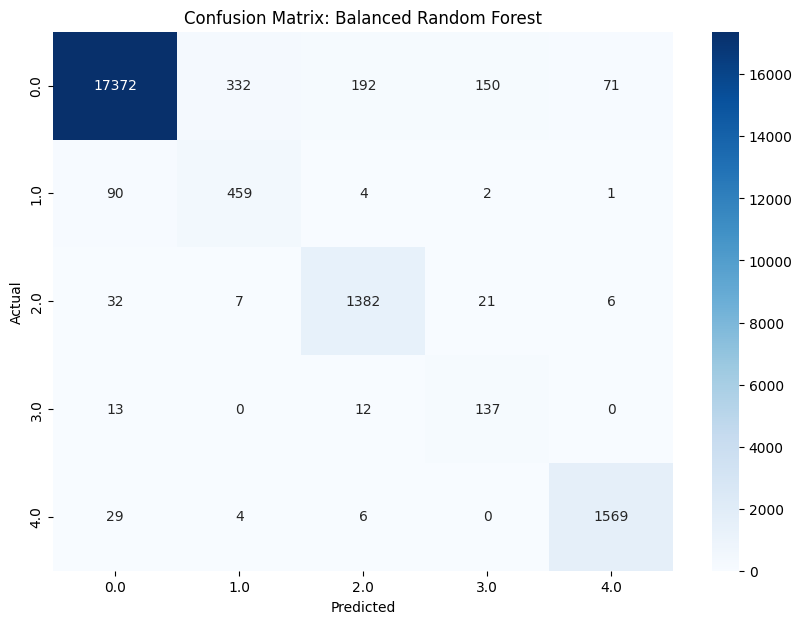

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los parámetros a probar en BalancedRandomForest
param_dist = {
    'model__n_estimators': [100, 500, 1000],  # Número de árboles
    'model__max_depth': [10, 20, 30, None],      # Profundidad máxima de los árboles
    'model__min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
}


# Cargar los datos
X = traindf.iloc[:, :-1]  # Todas las columnas excepto la última (características)
y = traindf.iloc[:, -1]    # La última columna (clase)

X_t = testdf.iloc[:, :-1]  # Todas las columnas excepto la última (características) (conjunto de prueba)
y_t = testdf.iloc[:, -1]   # La última columna (clase) (conjunto de prueba)

# Definir la validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline para BalancedRandomForest
pipeline_brf2 = Pipeline([
    ('under', RandomUnderSampler(sampling_strategy= {0.0: 10000}, random_state=42)),
    ('over', SMOTE(sampling_strategy={1.0: 6000, 2.0: 6000, 3.0: 6000}, random_state=42)),
    ('model', BalancedRandomForestClassifier(random_state=42, class_weight= 'balanced'))
])


grid_search_brf2 = GridSearchCV(pipeline_brf2, param_dist, cv=kf, scoring='f1_weighted', n_jobs=-1)

print("Balanced Random Forest Grid Search")
grid_search_brf2.fit(X, y)
print(f"Mejores parámetros BRF: {grid_search_brf2.best_params_}")

y_pred_brf2 = grid_search_brf2.best_estimator_.predict(X_t)

print("Resultados Balanced Random Forest:")
print(classification_report(y_t, y_pred_brf2))

# ---- Matriz de confusión para BalancedRandomForestClassifier ----
cm_brf = confusion_matrix(y_t, y_pred_brf2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_brf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_t), yticklabels=np.unique(y_t))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Balanced Random Forest')
plt.show()

#Prueba de hiperparámetros con GridSearch con un balanceo de 20000 muestras en cada clase.

Balanced Random Forest Grid Search


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `Fals

Mejores parámetros BRF: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Resultados Balanced Random Forest:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     18117
         1.0       0.73      0.80      0.76       556
         2.0       0.93      0.94      0.94      1448
         3.0       0.70      0.82      0.76       162
         4.0       0.98      0.97      0.97      1608

    accuracy                           0.97     21891
   macro avg       0.87      0.90      0.88     21891
weighted avg       0.98      0.97      0.97     21891



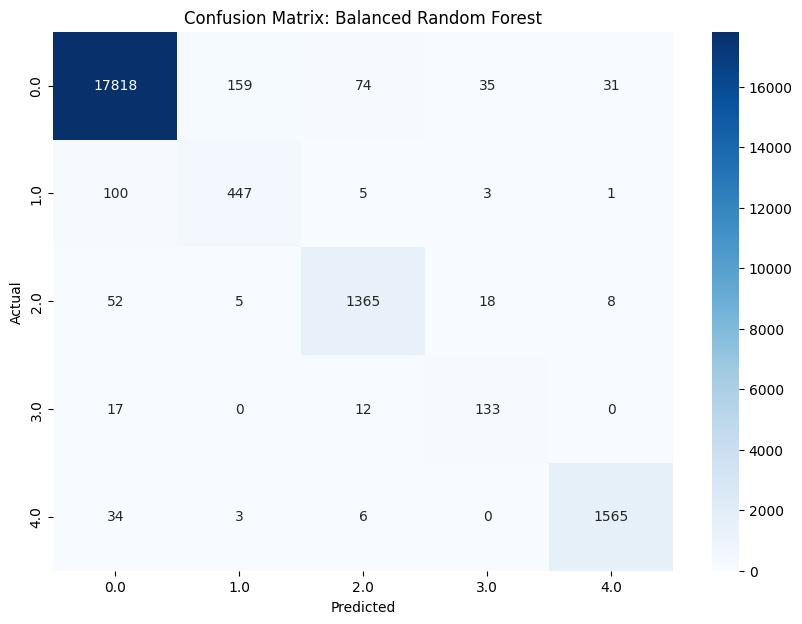

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los parámetros a probar en BalancedRandomForest
param_grid_brf1 = {
    'model__n_estimators': [100, 200, 500],  # Número de árboles
    'model__max_depth': [10, 20, 30, None],      # Profundidad máxima de los árboles
    'model__min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
}

# Cargar los datos
X = traindf.iloc[:, :-1]  # Todas las columnas excepto la última (características)
y = traindf.iloc[:, -1]    # La última columna (clase)

X_t = testdf.iloc[:, :-1]  # Todas las columnas excepto la última (características) (conjunto de prueba)
y_t = testdf.iloc[:, -1]   # La última columna (clase) (conjunto de prueba)

# Definir la validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline para BalancedRandomForest
pipeline_brf1 = Pipeline([
    ('under', RandomUnderSampler(sampling_strategy= {0.0: 20000}, random_state=42)),
    ('over', SMOTE()),
    ('model', BalancedRandomForestClassifier(random_state=42, class_weight= 'balanced'))
])


grid_search_brf1 = GridSearchCV(pipeline_brf1, param_grid_brf1, cv=kf, scoring='f1_weighted', n_jobs=-1)

print("Balanced Random Forest Grid Search")
grid_search_brf1.fit(X, y)
print(f"Mejores parámetros BRF: {grid_search_brf1.best_params_}")

y_pred_brf1 = grid_search_brf1.best_estimator_.predict(X_t)

print("Resultados Balanced Random Forest:")
print(classification_report(y_t, y_pred_brf1))

# ---- Matriz de confusión para BalancedRandomForestClassifier ----
cm_brf = confusion_matrix(y_t, y_pred_brf1)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_brf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_t), yticklabels=np.unique(y_t))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Balanced Random Forest')
plt.show()

Las pruebas con 20000 muestras en todas las clases nos dieron muy buenos resultados pero después nos dimos cuenta que no deberíamos de estar haciendo pruebas con balanceos en un modelo que ya balancea los datos internamente como lo es BalancedRandomForest.

Otra cosa es que temimos que debido a la disparidad en la estructura de los datos qeu sería al poner todas las clases en 20000, generaría un overfitting considerable en nuestro datos, además del costo excesivo de tiempo en correr los hiperparámetros con tantos datos.